In [1]:
import pandas as pd

In [47]:
df = pd.read_csv('acled.csv')

In [6]:
df.columns

Index([u'GWNO', u'EVENT_ID_CNTY', u'EVENT_ID_NO_CNTY', u'EVENT_DATE', u'YEAR',
       u'TIME_PRECISION', u'EVENT_TYPE', u'ACTOR1', u'ALLY_ACTOR_1', u'INTER1',
       u'ACTOR2', u'ALLY_ACTOR_2', u'INTER2', u'INTERACTION', u'COUNTRY',
       u'ADMIN1', u'ADMIN2', u'ADMIN3', u'LOCATION', u'LATITUDE', u'LONGITUDE',
       u'GEO_PRECISION', u'SOURCE', u'NOTES', u'FATALITIES'],
      dtype='object')

In [8]:
df_borno = df[df['COUNTRY']=='Nigeria']

In [10]:
df_borno = df_borno[df_borno['ADMIN1']=='Borno']

In [15]:
len(df_borno[df_borno['GEO_PRECISION']==3])

16

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns', None)

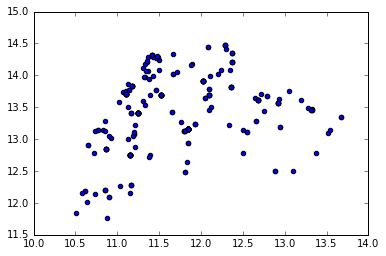

In [37]:
plt.scatter(lat, lon)

In [52]:
lat = df_borno['LATITUDE'].astype(float)

In [53]:
lon = df_borno['LONGITUDE'].astype(float)

In [38]:
import mplleaflet

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(lon, lat)
mplleaflet.display()

In [68]:
import geopandas as gpd

In [70]:
borno_shapes = gpd.read_file('VTS_Geometry/Boundary_VaccWards_Export.shp')

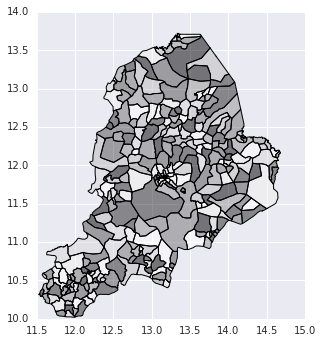

In [129]:
f = plt.figure(figsize=(10,10))
#ax = f.gca()
borno_shapes.plot()
#sns.kdeplot(data=df_borno.apply(lambda srs: pd.Series({'x': srs.geometry.x, 'y': srs.geometry.y}), axis='columns'), ax=ax,
  #         alpha=1)
#mplleaflet.display(fig=f)

In [88]:
import shapely
import seaborn as sns

In [86]:
df_borno = gpd.GeoDataFrame(df_borno, geometry=df_borno.apply(
        lambda srs: shapely.geometry.Point(float(srs['LONGITUDE']), float(srs['LATITUDE'])), axis='columns'))

In [90]:
import numpy as np

In [94]:
def assign_ward(incidents):
    bools = [geom.contains(incidents['geometry']) for geom in borno_shapes['geometry']]
    if True in bools:
        return borno_shapes.iloc[bools.index(True)]['WardName']
    else:
        return np.nan

In [95]:
df_borno['ward_name'] = df_borno.apply(assign_ward, axis='columns')

In [100]:
borno_shapes['incidents_by_ward'] = borno_shapes['WardName'].map(df_borno['ward_name'].value_counts())

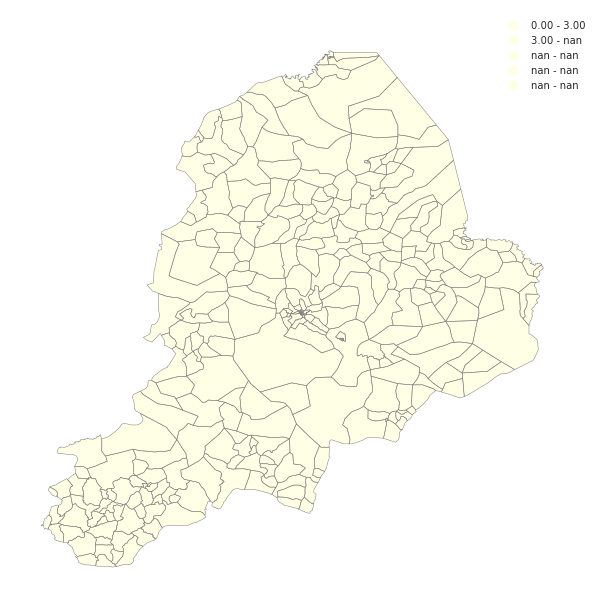

In [119]:
f = plt.figure(figsize=(10,10))
ax =f.gca()
kw = dict(column='incidents_by_ward', k=10, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
borno_shapes.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()

In [131]:
borno_shapes

,AMAPCODE,GlobalID,LGACode,SHAPE_Area,SHAPE_Leng,Source,StateCode,Timestamp,Urban,WardCode,WardName,geometry,incidents_by_ward
0,NIE BOS SHN SHA,e4dd8669-a1ad-44b2-8f0f-3838ff534aa5,127,0.012546,0.504504,EHA-OLUSEYE,BR,2016-09-14,No,12710,Shani,"POLYGON ((12.06956830990577 10.25349184196721,...",NaN
1,NIE BOS SHN GAS,41c9b3c6-cd09-4b3e-9e97-288b9ed54e6a,127,0.020477,0.642944,EHA-MICHAEL,BR,2016-09-23,No,12703,Gasi,"POLYGON ((11.8050306381649 10.27360190463103, ...",NaN
2,NIE BOS SHN GOR,f7aa983d-054e-4610-9784-add15f398090,127,0.006941,0.391998,EHA-MICHAEL,BR,2016-09-23,No,12704,Gora,"POLYGON ((11.92332188953821 10.11226125800765,...",NaN
3,NIE BOS NGZ LAK,a4840a2c-81fc-45c7-b123-7ac9675d3102,127,0.005081,0.338269,EHA-OLUSEYE,BR,2016-09-14,No,12708,Lakundum,"POLYGON ((11.91733201046838 10.23958175351593,...",NaN
4,NIE BOS SHN WAL,454adb13-0c74-4213-8b1f-def1151ba9ea,127,0.015712,0.606794,EHA-OLUSEYE,BR,2016-09-14,No,12711,Walama,"POLYGON ((12.00919366088408 10.34714610660085,...",NaN
5,NIE BOS SHN KUB,97fb6549-c447-4c5d-9ad9-39d0f6ef4afc,127,0.005249,0.323730,EHA-TOSIN,BR,2015-08-08,No,12707,Kubo,"POLYGON ((12.01116831822577 10.05989059042423,...",NaN
6,NIE BOS SHN KOM,d708d3c6-70e0-4c5b-ab2e-488831c35c14,127,0.008138,0.382878,EHA-MICHAEL,BR,2016-09-23,No,12709,Kombo,"POLYGON ((11.87064779874868 10.09390386553467,...",NaN
7,NIE BOS SHN GWA,be8feb22-7ca9-4f4e-8816-c9ef166accbd,127,0.017003,0.647054,EHA-MICHAEL,BR,2016-09-23,No,12706,Gwalasho,"POLYGON ((12.09279346468622 10.04326534312816,...",NaN
8,NIE BOS SHN BAR,5a9e771c-007f-4498-8a8e-11af0d04fc03,127,0.009557,0.496440,EHA-SAMUEL,BR,2015-09-30,No,12701,Bargu,"POLYGON ((11.95907410883018 10.1777704975181, ...",NaN
9,NIE BOS SHN BUM,bad2f872-6caa-482b-974b-ef8beec94e80,127,0.010065,0.485145,EHA-MICHAEL,BR,2016-09-23,No,12702,Buma,"POLYGON ((12.25715292136072 10.35977755018331,...",NaN


<bound method AxesSubplot.set_axis_off of <matplotlib.axes._subplots.AxesSubplot object at 0x15cdcd650>>

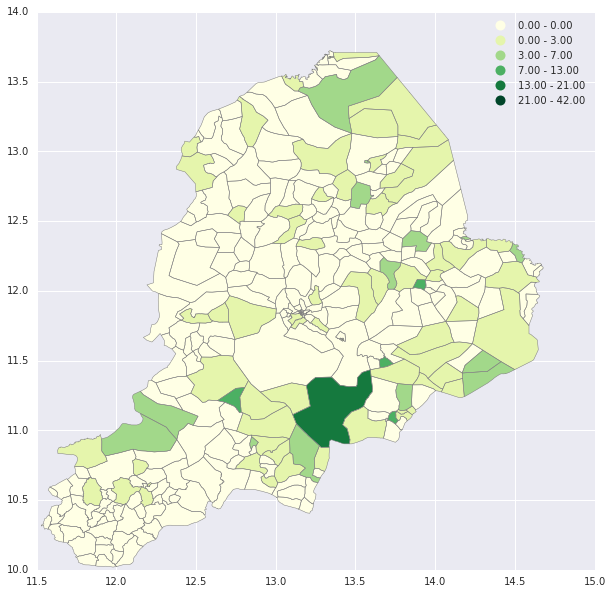

In [171]:
f = plt.figure(figsize=(10, 10))
ax = f.gca()
kw = dict(column='ward_incidents', k=6, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
borno_shapes.plot(scheme='Fisher_Jenks', ax=ax, **kw)
ax.set_axis_off


In [146]:
borno_shapes['ward_incidents'] = borno_shapes['incidents_by_ward'].fillna(0)

In [144]:
borno_shapes['incidents_by_ward']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      6.0
13      NaN
14      1.0
15      NaN
16      1.0
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      2.0
29      1.0
       ... 
280     5.0
281     1.0
282     NaN
283     NaN
284     NaN
285     2.0
286     2.0
287     NaN
288     NaN
289     NaN
290     NaN
291     NaN
292     2.0
293     3.0
294     4.0
295    13.0
296     NaN
297     1.0
298     NaN
299     NaN
300     NaN
301     2.0
302     NaN
303     NaN
304     NaN
305     1.0
306     NaN
307     NaN
308     4.0
309     NaN
Name: incidents_by_ward, dtype: float64